<a href="https://colab.research.google.com/github/asmajabr/FraudDetectionML/blob/master/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
% matplotlib inline
fraud_df=pd.read_csv('/content/drive/My Drive/creditcard.csv')


# get informatino about the credit card dataset

In [2]:
fraud_df.info

<bound method DataFrame.info of             Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]>

In [3]:
fraud_df.head()
print(f'Number of Null values is {fraud_df.isnull().sum().sum()}')
print(f'the Null values are {fraud_df.isnull().values.any()}')

Number of Null values is 0
the Null values are False


In [4]:
x=fraud_df.drop(['Class'],axis=1)
y=fraud_df.Class
print(fraud_df.shape)
print(x.shape)
print(y.shape)

(284807, 31)
(284807, 30)
(284807,)


## Plot the data of both fraud and normal 

Number of normal classes 284315 and Number of fruad classes 492


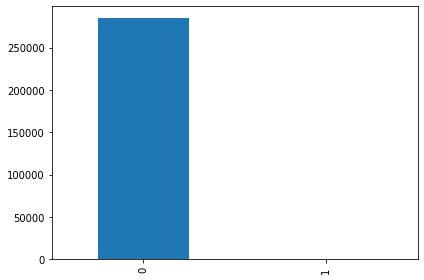

In [5]:
count_classes = pd.value_counts(fraud_df['Class'], sort = True).sort_index()
normal_classes=count_classes[0]
fraud_classes=count_classes[1]
print(f'Number of normal classes {normal_classes} and Number of fruad classes {fraud_classes}')
count_classes.plot(kind='bar')
plt.tight_layout()
plt.show()

## Let's try visualizing the cases of fraud and its **features** bold text

In [0]:
x=x.drop('Time',1).drop('Amount',1)

In [0]:
x_data_part_one = x.drop('V15', 1).drop('V16', 1).drop('V17', 1) \
    .drop('V18', 1).drop('V19', 1).drop('V20', 1).drop('V21', 1) \
    .drop('V22', 1).drop('V23', 1).drop('V24', 1).drop('V25', 1) \
    .drop('V26', 1).drop('V27', 1).drop('V28', 1)

In [0]:
x_data_part_two = x.drop('V1', 1).drop('V2', 1).drop('V3', 1) \
    .drop('V4', 1).drop('V5', 1).drop('V6', 1).drop('V7', 1) \
    .drop('V8', 1).drop('V9', 1).drop('V10', 1).drop('V11', 1) \
    .drop('V12', 1).drop('V13', 1).drop('V14', 1)

In [0]:

# Function to plot all features of normal (max 1000 random)/fraud rows
def plot_features(x, is_fraud):
    exs = y.loc[y == is_fraud]
    if (exs.shape[0] > 1000):
        exs = exs.head(1000)
        
    plt.figure(figsize=(10, 10))
    for ex in range(exs.shape[0]):
        case = x.iloc[exs.index[ex]]
        case.plot(kind = 'line')

Plot of features V1-V14 of fraud cases

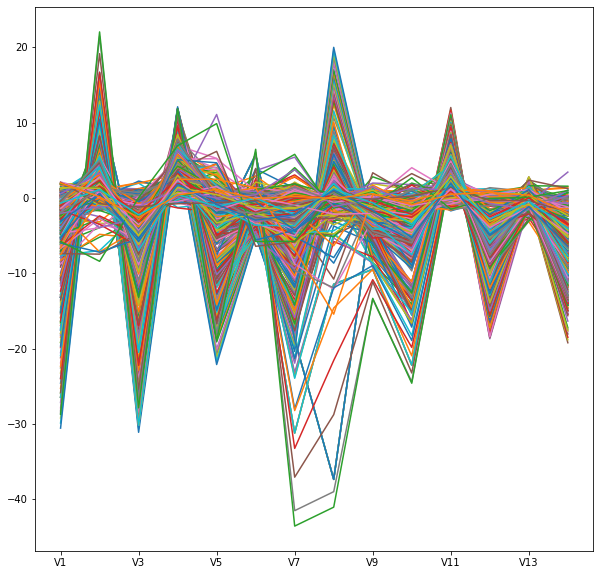

In [23]:

# Plot all the fraud case features in two plots (V1-V14, V15-V28)
plot_features(x_data_part_one, 1)

Plot of features V1-V14 of normal cases

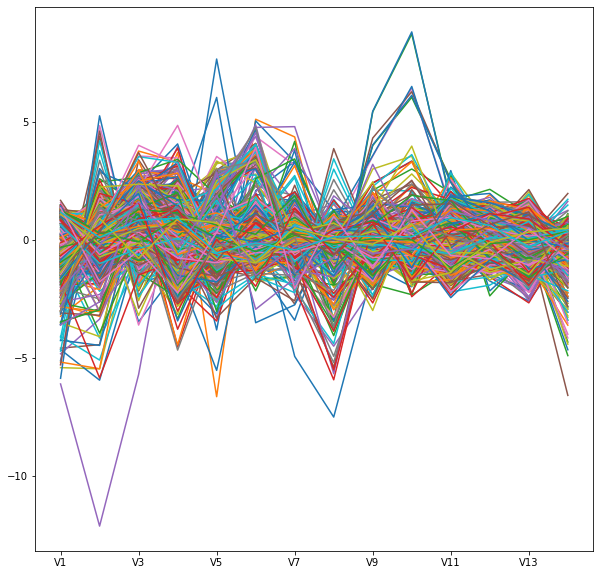

In [24]:
plot_features(x_data_part_one, 0)

Plot of features V15-V28 of fraud cases

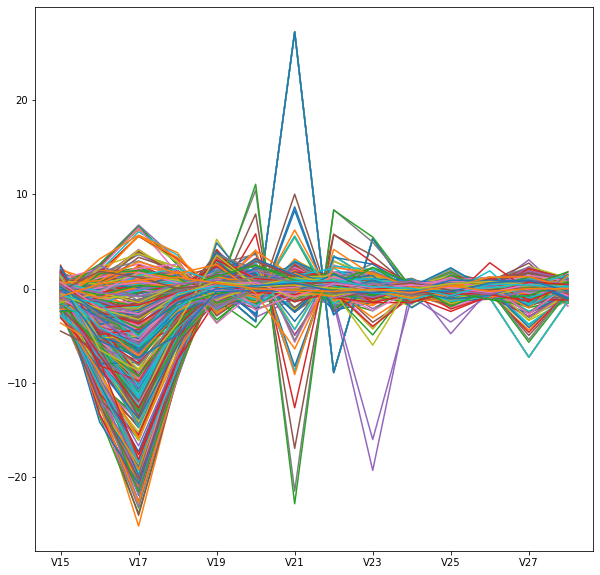

In [25]:
plot_features(x_data_part_two, 1)

Plot of features V15-V28 of normal cases

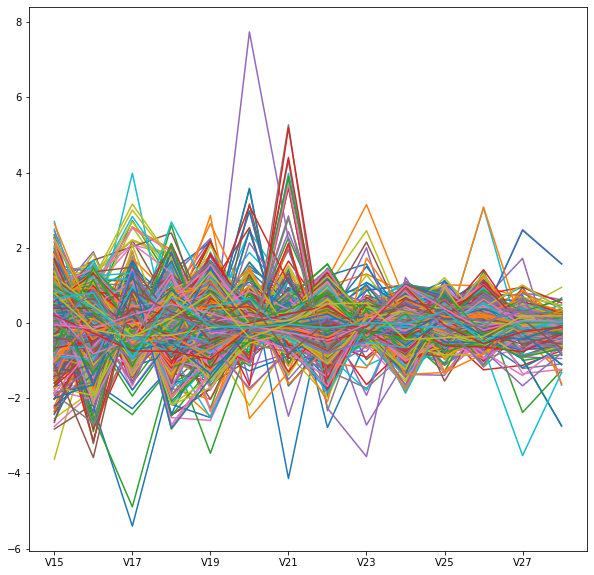

In [26]:
plot_features(x_data_part_two, 0)


We see that there are several key features in indicating that a transaction are fradulent: V1, V2, V3, V4, V5, V7, V8, V10, V11, V12, V17

our dataset is imbalanced so we need to deal with the imbalanced data
